In [1]:
import pandas as pd
file_url = 'https://www.statlearning.com/s/Advertising.csv'
try :
    data = pd.read_csv(file_url,index_col=0)
    print( "Dataset loaded succesfully")
except Exeception as e:
    print(f"Exception occured as {e}")
    

Dataset loaded succesfully


In [2]:
print(data.head())

      TV  radio  newspaper  sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
print(data.isnull().sum())

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


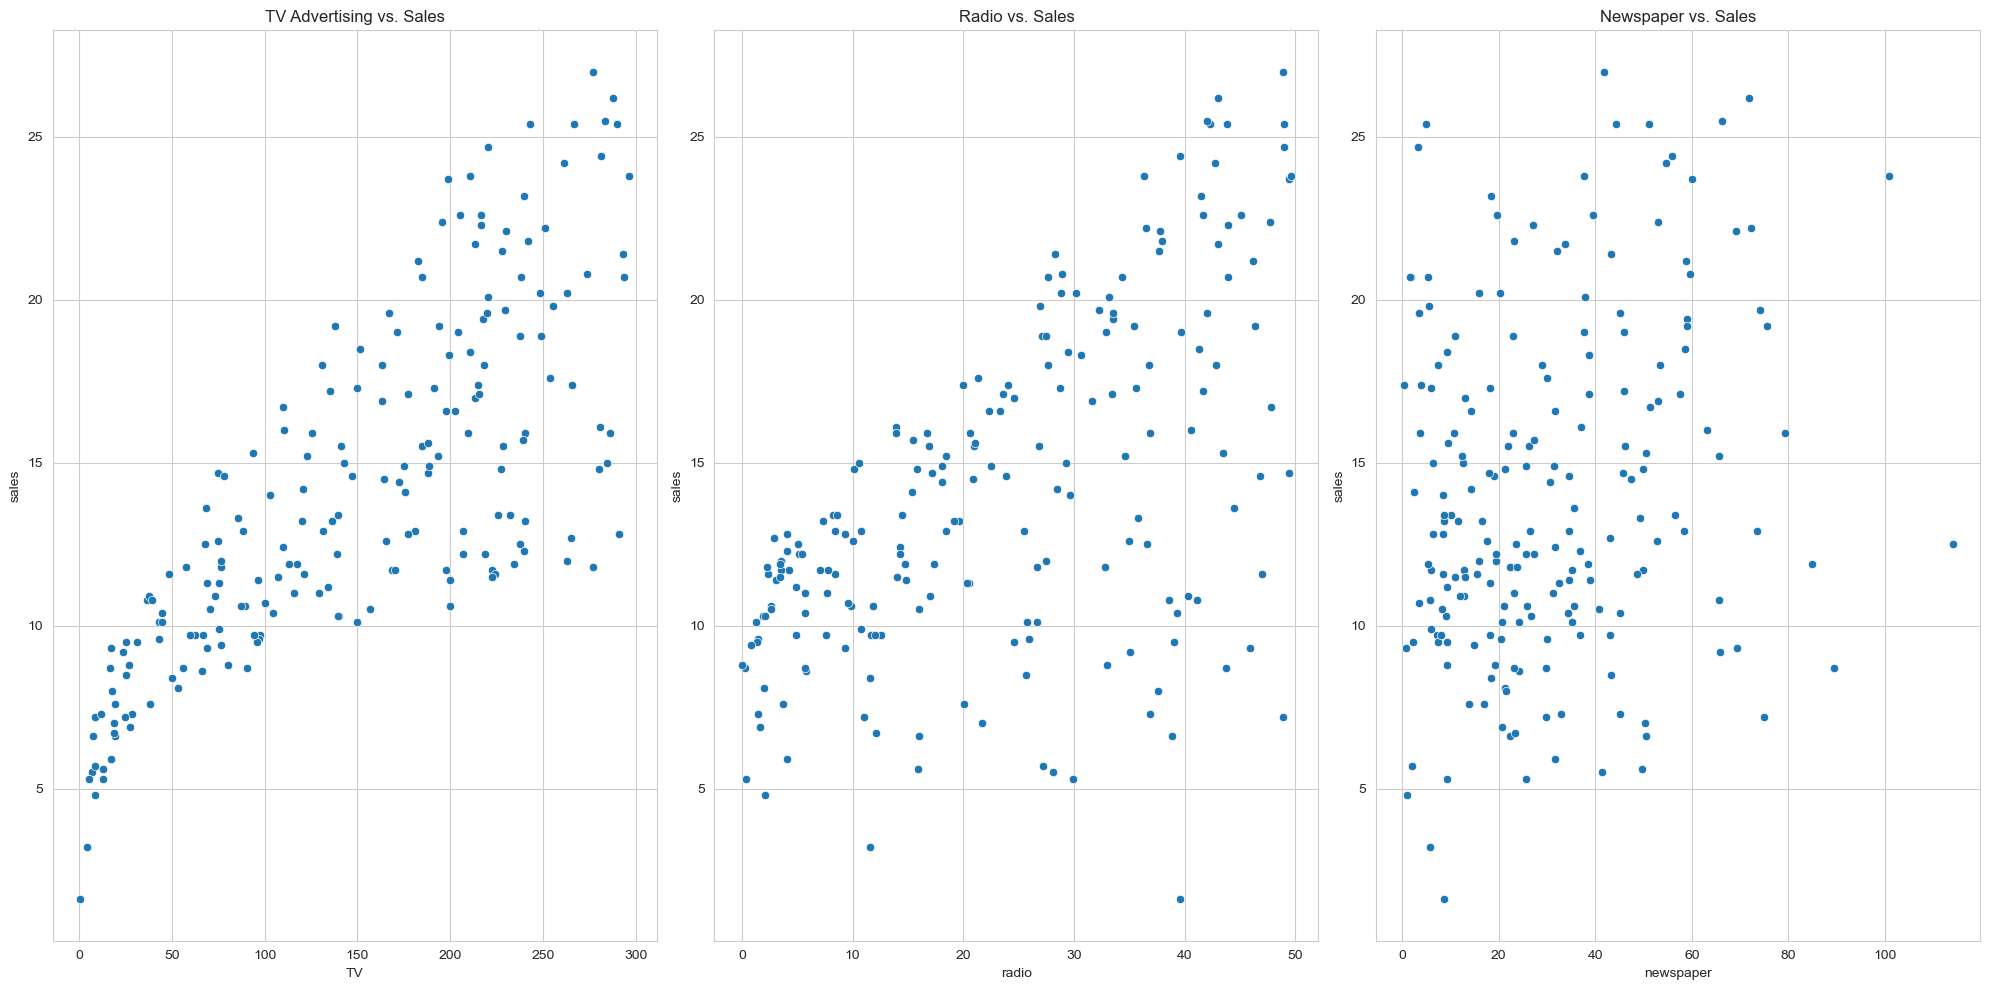

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
fig , axes = plt.subplots(1,3 , figsize = (20,10))
sns.scatterplot(x = "TV" , y = "sales", data = data, ax =axes[0])
axes[0].set_title('TV Advertising vs. Sales')
sns.scatterplot(x = "radio" , y = "sales", data = data, ax =axes[1])
axes[1].set_title('Radio vs. Sales')
sns.scatterplot(x = "newspaper" , y = "sales", data = data, ax =axes[2])
axes[2].set_title('Newspaper vs. Sales')
plt.tight_layout()
plt.show()


In [9]:
# Select the 'TV' column as our feature (X)
# The double square brackets [[...]] ensure that X is a DataFrame, which is good practice.
X = data[['TV']]

# Select the 'Sales' column as our target (y)
y = data['sales']

# Let's print the first 5 rows of each to make sure they look correct.
print("--- Features (X) ---")
print(X.head())

print("\n--- Target (y) ---")
print(y.head())

--- Features (X) ---
      TV
1  230.1
2   44.5
3   17.2
4  151.5
5  180.8

--- Target (y) ---
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64


In [11]:
import numpy as np
x_b = np.c_[np.ones((X.shape[0],1)),X.values]
y_np = y.values.reshape(-1,1)
np.random.seed(42)
theta = np.random.randn(2, 1)
learning_rate = 0.000001
iterations = 100000
print(f"Shape of X_b: {x_b.shape}")
print(f"Shape of y_np: {y_np.shape}")
print(f"Initial (random) theta:\n{theta}")
print(f"Learning Rate: {learning_rate}")
print(f"Iterations: {iterations}")


Shape of X_b: (200, 2)
Shape of y_np: (200, 1)
Initial (random) theta:
[[ 0.49671415]
 [-0.1382643 ]]
Learning Rate: 1e-06
Iterations: 100000


In [12]:
def compute_cost(x_b, y, theta):
    """Calculates the Mean Squared Error (MSE)."""
    m = len(y)
    predictions = x_b.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost
def gradient_descent(x_b, y, theta, learning_rate, iterations):
    """Performs gradient descent to find the best theta."""
    m = len(y)
    cost_history = []

    for i in range(iterations):
        predictions = x_b.dot(theta)
        errors = predictions - y
        gradient = (1/m) * x_b.T.dot(errors)
        theta = theta - learning_rate * gradient
        
        # Store the cost every 1000 iterations to check progress
        if i % 1000 == 0:
            cost_history.append(compute_cost(x_b, y, theta))
            
    return theta, cost_history    

In [ ]:
print("\n--- Training Started ---")
final_theta, cost_history = gradient_descent(x_b, y_np, theta, learning_rate, iterations)
print("--- Training Complete ---")


--- Training Started ---
--- Training Complete ---


In [15]:
print(f"\nFinal Cost (MSE): {cost_history[-1]}")
print(f"\nFinal Trained Theta (parameters):\n{final_theta}")

print(f"\nEquation of the line: Sales = {final_theta[0][0]:.4f} + {final_theta[1][0]:.4f} * TV")


Final Cost (MSE): 10.399893521525701

Final Trained Theta (parameters):
[[0.6612611 ]
 [0.07989187]]

Equation of the line: Sales = 0.6613 + 0.0799 * TV


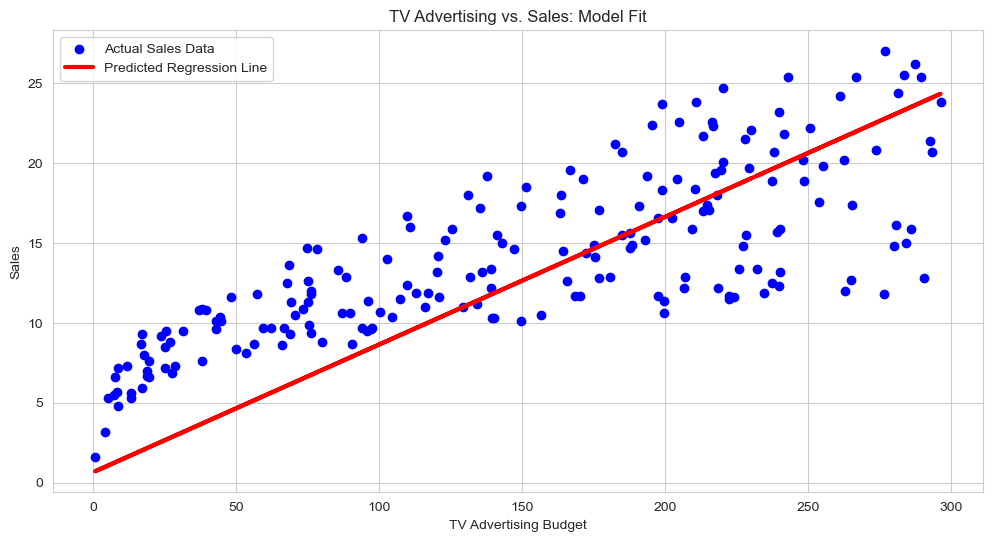

Corrected R-squared Score: 0.2323


In [19]:
import matplotlib.pyplot as plt

# --- 5a: Visualize the Model's Fit ---

plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Sales Data')
plt.plot(X, x_b.dot(final_theta), color='red', linewidth=3, label='Predicted Regression Line')
plt.title('TV Advertising vs. Sales: Model Fit')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


# --- 5b: Evaluate with R-squared (Corrected Function) ---

def r_squared_corrected(y_true, y_pred):
    """Calculates the R-squared value correctly by flattening arrays."""
    # Flatten both arrays to ensure they are 1D
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()
    
    # Calculate the mean of the true y values
    y_mean = np.mean(y_true_flat)
    
    # Calculate SST and SSR
    sst = np.sum((y_true_flat - y_mean)**2)
    ssr = np.sum((y_true_flat - y_pred_flat)**2)
    
    # Calculate R-squared
    r2 = 1 - (ssr / sst)
    return r2

# Get all predictions for our original data X
y_predictions = x_b.dot(final_theta)

# Calculate R-squared using the corrected function
r2_score = r_squared_corrected(y_np, y_predictions)

print(f"Corrected R-squared Score: {r2_score:.4f}")

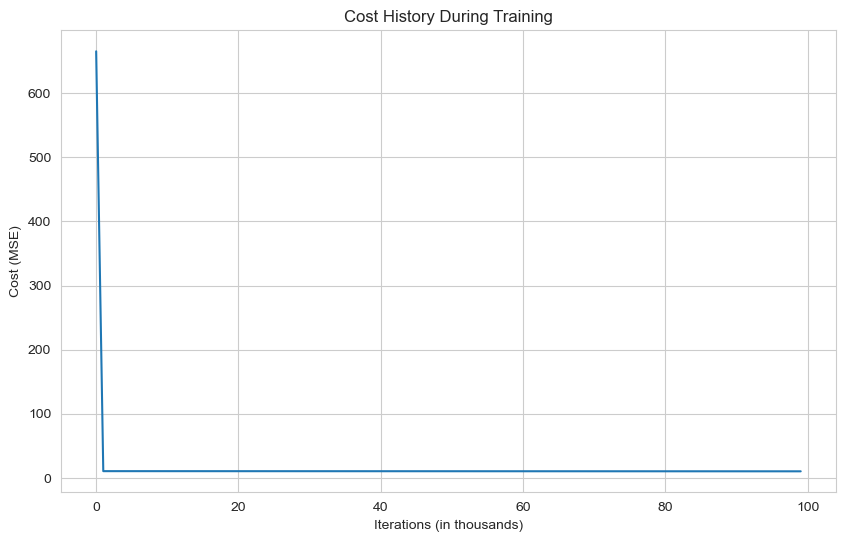

In [17]:
import matplotlib.pyplot as plt

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost History During Training')
plt.xlabel('Iterations (in thousands)')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()